# Numerik Projekt 4
### Schaltungsmodelierung und -simulation 2

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import solver as num
import signals as sig
# from PyLTSpice.LTSpice_RawRead import LTSpiceRawRead

## Aufgabe 1

**Parameter**

In [71]:
# Widerstände
R1 = 1.e3
R2 = 1.e3
R3 = 1.e3
R4 = 2.e3

# Kondensatoren
C1 = 1.e-9
C2 = 1.e-9
C3 = 1.e-9

UC1_0 = 0.
UC2_0 = 0.
UC3_0 = 0.

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Quellen
def U0(t):
    return sig.step(t)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

**Differenzialgleichungsystem**

In [72]:
# Differenzialgleichungsystem
def f1(t, x):
    return np.array([(((U0(t)-x[0])*R2)-(R1*(x[0]-x[1]-x[2])))/(C1*R1*R2),(((x[0]-x[1]-x[2])*R3)-(x[1]*R2))/(R2*C2*R3),(((x[0]-x[1]-x[2])*R4)-(x[2]*R2))/(R2*R4*C3)], dtype=np.float64) # Uc1 = x[0], Uc2 = x[1], Uc3 = x[2]

def df1(t, x):
    return np.array([[(R1+R2)/(C1*R2*R3), R1/(C1*R2*R3), R1/(C1*R2*R3)],
                    [1/(C2*R2), (R2+R3)/(R2*R3*C2), 1/(C2*R2)],
                    [1/(C3*R2), 1/(C3*R2), (R2+R4)/(R2*R4*C3)]], dtype=np.float64)

## Aufgabe 2

In [73]:
# Analytische Lösung
def UC1(t):
    return U0(t)*((R2+R3+R4)/(R1+R2+R3+R4))*(1-np.exp(-t/(R1*C1)))

def UC2(t):
    return U0(t)*((R3)/(R1+R2+R3+R4))*(1-np.exp(-t/((R1+R2+R4)*C2)))

def UC3(t):
    return U0(t)*((R4)/(R1+R2+R3+R4))*(1-np.exp(-t/((R1+R2+R3)*C3)))

In [74]:
Tend = 5 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

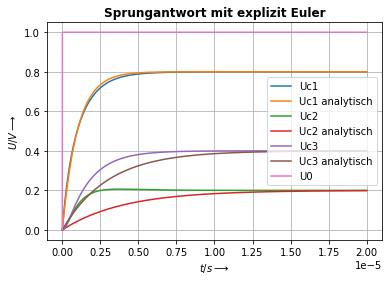

In [75]:
plt.plot(t1,x1[:,0],label='Uc1')
plt.plot(t1,UC1(t1),label='Uc1 analytisch')
plt.plot(t1,x1[:,1],label='Uc2')
plt.plot(t1,UC2(t1),label='Uc2 analytisch')
plt.plot(t1,x1[:,2],label='Uc3')
plt.plot(t1,UC3(t1),label='Uc3 analytisch')
plt.plot(t1,U0(t1),label='U0')
plt.legend()
plt.title('Sprungantwort mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe2_explizit.jpg", dpi=200)
plt.show()

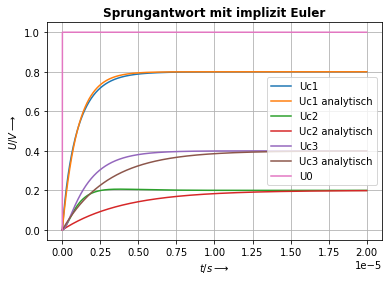

In [76]:
plt.plot(t2,x2[:,0],label='Uc1')
plt.plot(t2,UC1(t2),label='Uc1 analytisch')
plt.plot(t2,x2[:,1],label='Uc2')
plt.plot(t2,UC2(t2),label='Uc2 analytisch')
plt.plot(t2,x2[:,2],label='Uc3')
plt.plot(t2,UC3(t2),label='Uc3 analytisch')
plt.plot(t2,U0(t2),label='U0')
plt.legend()
plt.title('Sprungantwort mit implizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe2_implizit.jpg", dpi=200)
plt.show()

## Aufgabe 3

### 1. Test mit Sprungfunktion

In [77]:
# Widerstände
R1 = 1.e3 # Ohm
R2 = 2.e3 # Ohm
R3 = 3.e3 # Ohm
R4 = 4.e3 # Ohm

# Kondensatoren
C1 = 1.e-9 # Farat
C2 = 2.e-9 # Farat
C3 = 3.e-9 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0. # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Sprungfunktion
def U0(t):
    return sig.step(t,1,5e-6)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)


In [78]:
Tend = 5 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

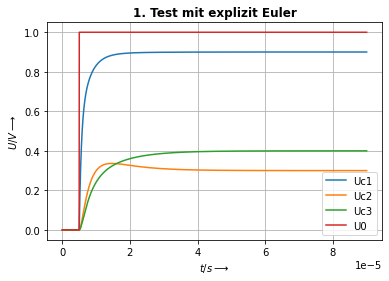

In [79]:
plt.plot(t1,x1[:,0],label='Uc1')
plt.plot(t1,x1[:,1],label='Uc2')
plt.plot(t1,x1[:,2],label='Uc3')
plt.plot(t1, U0(t1),label='U0')
plt.legend()
plt.title('1. Test mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_1_explizit.jpg", dpi=200)
plt.show()

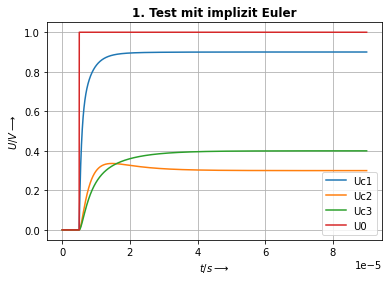

In [80]:
plt.plot(t2,x2[:,0],label='Uc1')
plt.plot(t2,x2[:,1],label='Uc2')
plt.plot(t2,x2[:,2],label='Uc3')
plt.plot(t2, U0(t2),label='U0')
plt.legend()
plt.title('1. Test mit implizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_1_implizit.jpg", dpi=200)
plt.show()

### 2. Test mit Rechteckfunktion

In [81]:
# Widerstände
R1 = 1.e3 # Ohm
R2 = 2.e3 # Ohm
R3 = 3.e3 # Ohm
R4 = 4.e3 # Ohm

# Kondensatoren
C1 = 1.e-9 # Farat
C2 = 2.e-9 # Farat
C3 = 3.e-9 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0. # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Anzahl Perioden
per = 2

# Sprungfunktion
def U0(t):
    return sig.square(t, 1/(2*3*np.max(tau)))

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [82]:
Tend = 2 * per * 3 * np.max(tau) # Endzeit
n = 5e3     # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

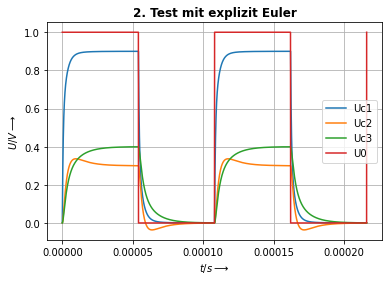

In [83]:
plt.plot(t1,x1[:,0],label='Uc1')
plt.plot(t1,x1[:,1],label='Uc2')
plt.plot(t1,x1[:,2],label='Uc3')
plt.plot(t1, U0(t1),label='U0')
plt.legend()
plt.title('2. Test mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_2_explizit.jpg", dpi=200)
plt.show()

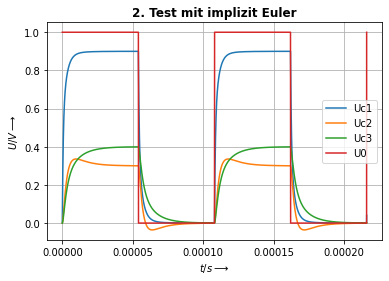

In [84]:
plt.plot(t2,x2[:,0],label='Uc1')
plt.plot(t2,x2[:,1],label='Uc2')
plt.plot(t2,x2[:,2],label='Uc3')
plt.plot(t2, U0(t2),label='U0')
plt.legend()
plt.title('2. Test mit implizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_2_implizit.jpg", dpi=200)
plt.show()

### 3. Test mit grösseren Bauteilwerten und geldenem Kondensator C2 bei t=0

In [85]:
# Widerstände
R1 = 4.e5 # Ohm
R2 = 3.e5 # Ohm
R3 = 2.e5 # Ohm
R4 = 3.e5 # Ohm

# Kondensatoren
C1 = 3.e-6 # Farat
C2 = 2.e-6 # Farat
C3 = 1.e-7 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0.5 # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Spannungsquelle
def U0(t):
    return sig.step(t,1,1)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [86]:
Tend = 5 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

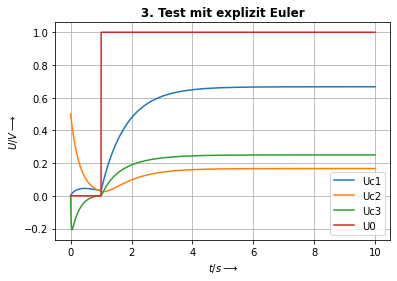

In [87]:
plt.plot(t1,x1[:,0],label='Uc1')
plt.plot(t1,x1[:,1],label='Uc2')
plt.plot(t1,x1[:,2],label='Uc3')
plt.plot(t1, U0(t1),label='U0')
plt.legend()
plt.title('3. Test mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_3_explizit.jpg", dpi=200)
plt.show()

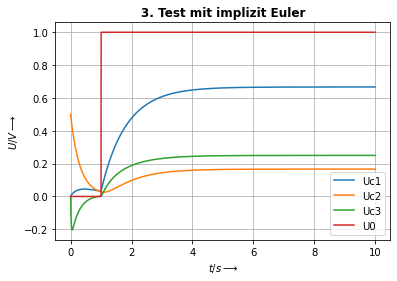

In [88]:
plt.plot(t2,x2[:,0],label='Uc1')
plt.plot(t2,x2[:,1],label='Uc2')
plt.plot(t2,x2[:,2],label='Uc3')
plt.plot(t2, U0(t2),label='U0')
plt.legend()
plt.title('3. Test mit implizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe3_3_implizit.jpg", dpi=200)
plt.show()

## Aufgabe 4

In [89]:
# Widerstände
R1 = 1.e4
R2 = 1.e3
R3 = 1.e3
R4 = 2.e3

# Kondensatoren
C1 = 1.e-9
C2 = 1.e-9
C3 = 1.e-9

UC1_0 = 0.
UC2_0 = 0.
UC3_0 = 0.

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Quellen
def U0(t):
    return sig.step(t)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [90]:
# Lösung im stationäreren Zustand
def UC1(t):
    return U0(t)*((R2+R3+R4)/(R1+R2+R3+R4))

def UC2(t):
    return U0(t)*((R3)/(R1+R2+R3+R4))

def UC3(t):
    return U0(t)*((R4)/(R1+R2+R3+R4))


In [91]:
Tend = 5 * np.max(tau) # Endzeit # Endzeit
n = 5e3     # Schritte
tol = 1e-2

h = Tend/n
t, x = num.explizitEuler(Tend, h, x0, f1)

err1 = 1
err2 = 1
err3 = 1
j = 0

while(err1 >= tol*UC1(1) and err2 >= tol*UC2(1) and err3 >= tol*UC3(1)):
    err1 = np.abs(UC1(t[j]) - x[j,0])
    err2 = np.abs(UC2(t[j]) - x[j,1])
    err3 = np.abs(UC3(t[j]) - x[j,2])
    j += 1

In [92]:
print('Error 1:\t%.10f' % (err1))
print('Error 2:\t%.10f' % (err2))
print('Error 3:\t%.10f' % (err3))
print('Time:\t\t%.10f' % (t[j]))
print('Tau:\t\t%2.5f' % (np.max(tau)))

Error 1:	0.0000000000
Error 2:	0.0000000000
Error 3:	0.0000000000
Time:		0.0000000130
Tau:		0.00001


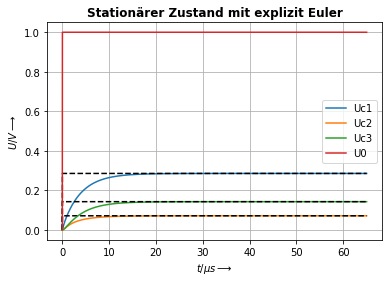

In [93]:
t *= 1e6
plt.plot(t,x[:,0],label='Uc1')
plt.plot(t,UC1(t), 'k--')
plt.plot(t,x[:,1],label='Uc2')
plt.plot(t,UC2(t), 'k--')
plt.plot(t,x[:,2],label='Uc3')
plt.plot(t,UC3(t), 'k--')
plt.plot(t, U0(t),label='U0')
plt.legend()
plt.title('Stationärer Zustand mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / \mu s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe4_explizit.jpg", dpi=200)
plt.show()

## Aufgabe 5

### Test mit Sinus

In [94]:
# Widerstände
R1 = 1.e3 # Ohm
R2 = 2.e3 # Ohm
R3 = 3.e3 # Ohm
R4 = 4.e3 # Ohm

# Kondensatoren
C1 = 1.e-9 # Farat
C2 = 2.e-9 # Farat
C3 = 3.e-9 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0. # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Amplitude
Vpeak = 1 # V

# Frequenz
f = 5e4 # Hz

# Quelle
def U0(t):
    return Vpeak * np.sin(2*np.pi*f*t)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [95]:
Tend = 10 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

In [96]:
start1 = int(np.size(t1)/2)
start2 = int(np.size(t2)/2)

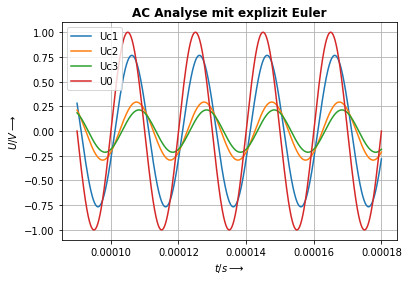

In [97]:
plt.plot(t1[start1:],x1[start1:,0],label='Uc1')
plt.plot(t1[start1:],x1[start1:,1],label='Uc2')
plt.plot(t1[start1:],x1[start1:,2],label='Uc3')
plt.plot(t1[start1:],U0(t1[start1:]),label='U0')
plt.legend()
plt.title('AC Analyse mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe5_explizit.jpg", dpi=200)
plt.show()

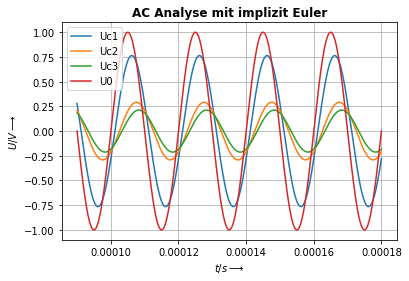

In [98]:
plt.plot(t2[start2:],x2[start2:,0],label='Uc1')
plt.plot(t2[start2:],x2[start2:,1],label='Uc2')
plt.plot(t2[start2:],x2[start2:,2],label='Uc3')
plt.plot(t2[start2:],U0(t2[start2:]),label='U0')
plt.legend()
plt.title('AC Analyse mit implizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe5_implizit.jpg", dpi=200)
plt.show()

### Vergleich mit analytischer Lösung

In [99]:
# Widerstände
R1 = 1.e3 # Ohm
R2 = 2.e3 # Ohm
R3 = 3.e3 # Ohm
R4 = 4.e3 # Ohm

# Kondensatoren
C1 = 1.e-9 # Farat
C2 = 2.e-9 # Farat
C3 = 3.e-9 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0. # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Amplitude
Vpeak = 1 # V

# Frequenz
f = 5e4 # Hz
w = 2*np.pi*f

# impendanz
ZC1 = 1/w*C1
ZC2 = 1/w*C2
ZC3 = 1/w*C3

# Quelle
def U0(t):
    return Vpeak * np.sin(2*np.pi*f*t)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [100]:
# analytische Lösung mit komplexer Impendanz
def UC1_z(t):
    return U0(t) * ((R2*(1+w*C2*R3)*(1+w*C3*R4) + R3*(1+w*C3*R4) + R4*(1+w*C2*R3))/((1+w*C2*R3)*(1+w*C3*R4) + w*C1*(R2*(1+w*C2*R3)*(1+w*C3*R4) + R3*(1+w*C3*R4) + R4*(1+w*C2*R3)))) / (((R2*(1+w*C2*R3)*(1+w*C3*R4) + R3*(1+w*C3*R4) + R4*(1+w*C2*R3))/((1+w*C2*R3)*(1+w*C3*R4) + w*C1*(R2*(1+w*C2*R3)*(1+w*C3*R4) + R3*(1+w*C3*R4) + R4*(1+w*C2*R3)))) + R1)

def UC2_z(t):
    return U0(t) * ((R3/(1+w*C2*R3))/(R1+R2+(R3/(1+w*C2*R3))+(R4/(1+w*C3*R4))))

def UC3_z(t):
    return U0(t) * ((R4/(1+w*C3*R4))/(R1+R2+(R3/(1+w*C2*R3))+(R4/(1+w*C3*R4))))

In [101]:
Tend = 10 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t1, x1 = num.explizitEuler(Tend, h, x0, f1)
t2, x2 = num.implizitEuler(Tend, h, x0, f1, df1)

In [102]:
start1 = int(np.size(t1)/2)
start2 = int(np.size(t2)/2)

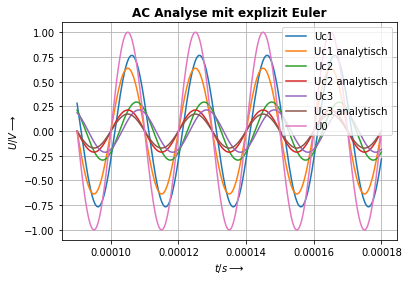

In [103]:
plt.plot(t1[start1:],x1[start1:,0],label='Uc1')
plt.plot(t1[start1:],UC1_z(t1[start1:]),label='Uc1 analytisch')
plt.plot(t1[start1:],x1[start1:,1],label='Uc2')
plt.plot(t1[start1:],UC2_z(t1[start1:]),label='Uc2 analytisch')
plt.plot(t1[start1:],x1[start1:,2],label='Uc3')
plt.plot(t1[start1:],UC3_z(t1[start1:]),label='Uc3 analytisch')
plt.plot(t1[start1:],U0(t1[start1:]),label='U0')
plt.legend()
plt.title('AC Analyse mit explizit Euler', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe5_explizit_zusatz.jpg", dpi=200)
plt.show()

## Aufgabe 6

In [104]:
# Widerstände
R1 = 4.e5 # Ohm
R2 = 3.e5 # Ohm
R3 = 2.e5 # Ohm
R4 = 3.e5 # Ohm

# Kondensatoren
C1 = 3.e-6 # Farat
C2 = 2.e-6 # Farat
C3 = 1.e-7 # Farat

UC1_0 = 0. # Volt
UC2_0 = 0.5 # Volt
UC3_0 = 0. # Volt

# Tau
tau = np.array([R1*C1, (R1+R2+R4)*C2, (R1+R2+R3)*C3])

# Spannungsquelle
def U0(t):
    return sig.step(t,1,1)

# Anfangsbedingungen
x0 = np.array([UC1_0,UC2_0,UC3_0]) # Uc1(t=0), Uc2(t=0), Uc3(t=0)

In [105]:
Tend = 5 * np.max(tau) # Endzeit
n = 5e3 # Schritte

h = Tend/n
t, x = num.implizitTrapez(Tend, h, x0, f1, df1)

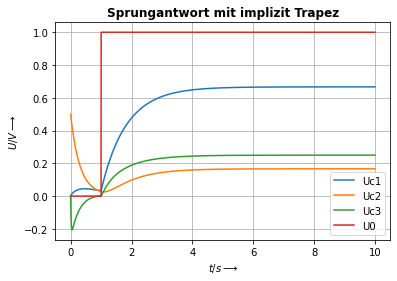

In [106]:
plt.plot(t,x[:,0],label='Uc1')
plt.plot(t,x[:,1],label='Uc2')
plt.plot(t,x[:,2],label='Uc3')
plt.plot(t, U0(t),label='U0')
plt.legend()
plt.title('Sprungantwort mit implizit Trapez', fontweight="bold")
plt.xlabel(r'$t / s \longrightarrow$')
plt.ylabel(r'$U / V \longrightarrow$')
plt.grid()
plt.savefig("aufgabe6_trapez.jpg", dpi=200)
plt.show()